In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot
import pprint
from collections import Counter, OrderedDict
import json

In [2]:
data = pd.read_hdf('/scratch/gjr286/BandhubDataset.h5', 'bandhub')

In [3]:
data.columns

Index(['trackId', 'songId', 'masterOwner', 'trackOwner', 'artist', 'title',
       'subTitle', 'views', 'instrument', 'contentTags', 'audioURL',
       'processedAudioURL', 'trackVideoURL', 'startTime', 'trackDuration',
       'audioSampleRate', 'fromYouTube', 'isFinished', 'isPublished',
       'hasPublishedTracks', 'mixedAudioURL', 'mixedVideoURL', 'musicBrainzID',
       'newMusicBrainzID', 'publicSongCollectionIndex', 'volume1', 'volume2',
       'mute1', 'mute2', 'solo1', 'solo2', 'compressorValue1',
       'compressorValue2', 'panValue1', 'panValue2', 'echoValue1',
       'echoValue2', 'noiseGateValue1', 'noiseGateValue2', 'reverbValue1',
       'reverbValue2', 'eqValue1', 'eqValue2'],
      dtype='object')

In [4]:
# multitracks length distributions
def getMultiTrackLens(dummyData):
    groupedData = dummyData.groupby("songId")
    #groupedData = pubData.groupby("songId") # number of multitrack distributions
    multiTrackLens = []
    for name,group in groupedData:
        multiTrackLens.append(len(group))
    return multiTrackLens

In [5]:
# song (mix) durations distributions
def getSongDurations(dummyData):
    groupedData = dummyData.groupby("songId")
    songDurations = []
    for name,group in groupedData:
        trackDurations = group.trackDuration
        startTimes = group.startTime
        maxLength = 0
        count = 0
        for duration in trackDurations:
            currLength = duration + (startTimes.iloc[count] / 44100)
            if currLength > maxLength:
                maxLength = currLength
            count+=1
        songDurations.append(maxLength)
    return songDurations

In [6]:
# content tag bar chart
def getContentTags(dummyData):
    contentTagData = dummyData.loc[dummyData.contentTags != 'null']
    print('Number of Tracks with Content Tags:', len(contentTagData))
    contentTags = []
    for i in contentTagData.contentTags:
        dummyStr = json.loads(i)
        for word in dummyStr:
            contentTags.append(word)
    print('Number of Content Tags:', len(contentTags))
    contentTagCounts = Counter(contentTags)
    contentTagCounts = OrderedDict(contentTagCounts.most_common())
    df = pd.DataFrame.from_dict(contentTagCounts, orient='index')
    return df

In [7]:
# instrument label bar chart
def getInstrumentLabels(dummyData):
    instrumentData = dummyData.loc[pd.notnull(dummyData.instrument)]
    print('Number of Tracks with Instrument Labels:', len(instrumentData))
    instrumentCounts = Counter(instrumentData.instrument)
    instrumentCounts = OrderedDict(instrumentCounts.most_common())
    df = pd.DataFrame.from_dict(instrumentCounts, orient='index')
    return df

In [8]:
# general information about number of tracks, songs, etc. in the dataset
print('All Tracks:',len(data))
nonYouTubeDataAll = data.loc[data.fromYouTube == False]
youTubeDataAll = data.loc[data.fromYouTube == True]
print('Non-YouTube Tracks:', len(nonYouTubeDataAll), '/' , len(data))
print('YouTube Tracks:', len(youTubeDataAll), '/', len(data))
print('')
pubData = data.loc[data.isPublished == True] #grab published tracks
print('Published Tracks:',len(pubData))
nonYouTubeData = pubData.loc[pubData.fromYouTube == False]
youTubeData = pubData.loc[pubData.fromYouTube == True]
print('Non-YouTube Published Tracks:', len(nonYouTubeData), '/', len(pubData))
print('YouTube Published Tracks:', len(youTubeData), '/', len(pubData))
print('')
print('All Songs (Mixes):', len(pd.unique(data.songId)))
print('Published Songs (Mixes):', len(pd.unique(pubData.songId)))

All Tracks: 597370
Non-YouTube Tracks: 360803 / 597370
YouTube Tracks: 236567 / 597370

Published Tracks: 290616
Non-YouTube Published Tracks: 167730 / 290616
YouTube Published Tracks: 122886 / 290616

All Songs (Mixes): 239711
Published Songs (Mixes): 130379


In [9]:
# Info for published tracks (currently downloaded) is below

DescribeResult(nobs=130379, minmax=(1, 65), mean=2.2290092729657385, variance=8.333539716269533, skewness=3.3506788101598612, kurtosis=16.826845389271856)

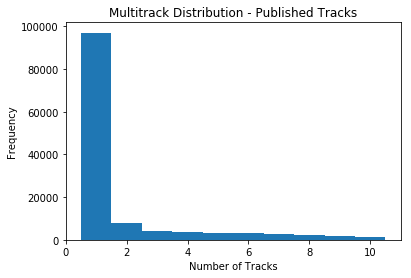

In [11]:
# multitrack descriptive stats and distribution for published tracks
multiTracks = getMultiTrackLens(pubData)
pyplot.hist(multiTracks,10, (0.5, 10.5))
pyplot.title("Multitrack Distribution - Published Tracks")
pyplot.xlabel("Number of Tracks")
pyplot.ylabel("Frequency")
stats.describe(multiTracks)

DescribeResult(nobs=290616, minmax=(-67.80525, 36480.683333), mean=219.34025613761114, variance=20693.567068933444, skewness=66.68518899595826, kurtosis=14565.549786935251)

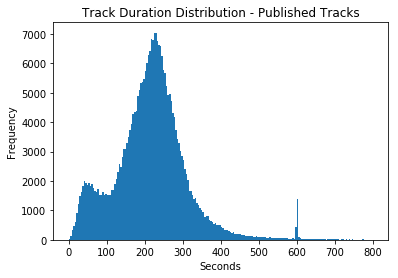

In [12]:
# track durations for published tracks
durationData = pubData.trackDuration
pyplot.hist(durationData, 200, (0, 800))
pyplot.title("Track Duration Distribution - Published Tracks")
pyplot.xlabel("Seconds")
pyplot.ylabel("Frequency")
stats.describe(durationData)

DescribeResult(nobs=130379, minmax=(0.068333, 36480.683333), mean=246.11741268022044, variance=32076.40791128503, skewness=73.68032226919834, kurtosis=13338.704431513564)

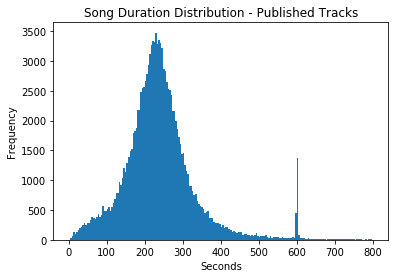

In [13]:
# song (mix) durations for published tracks
songDurations = getSongDurations(pubData)
pyplot.hist(songDurations, 200, (0, 800))
pyplot.title("Song Duration Distribution - Published Tracks")
pyplot.xlabel("Seconds")
pyplot.ylabel("Frequency")
stats.describe(songDurations)

Number of Tracks with Content Tags: 5603
Number of Content Tags: 12566


Text(0,0.5,'Frequency')

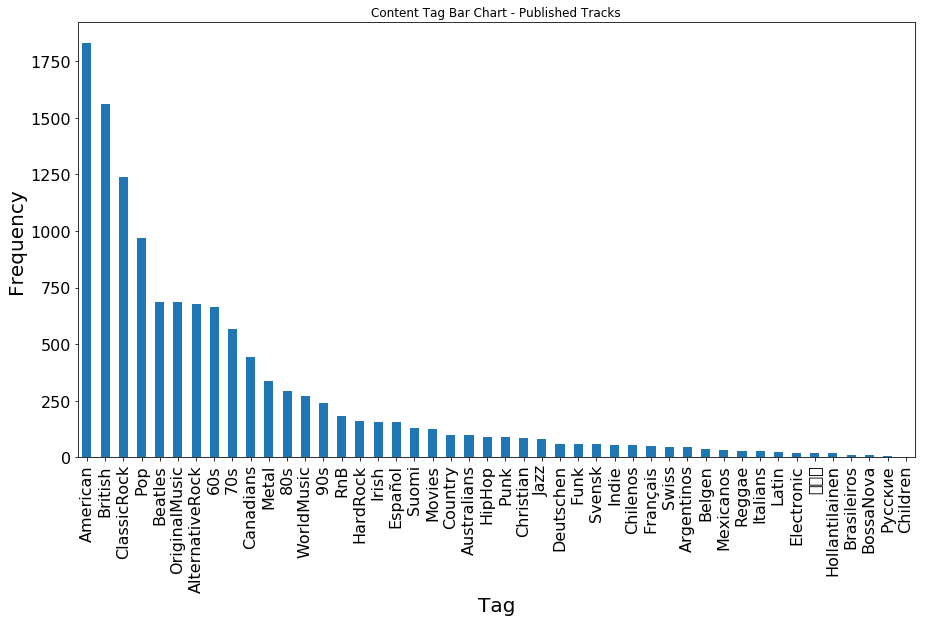

In [14]:
# content tag frequency bar chart for published tracks
dfContent = getContentTags(pubData)
ax = dfContent.plot(kind='bar', title = 'Content Tag Bar Chart - Published Tracks', legend = False, figsize=(15,8), fontsize = 16)
ax.set_xlabel("Tag", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)   

Number of Tracks with Instrument Labels: 47645


Text(0,0.5,'Frequency')

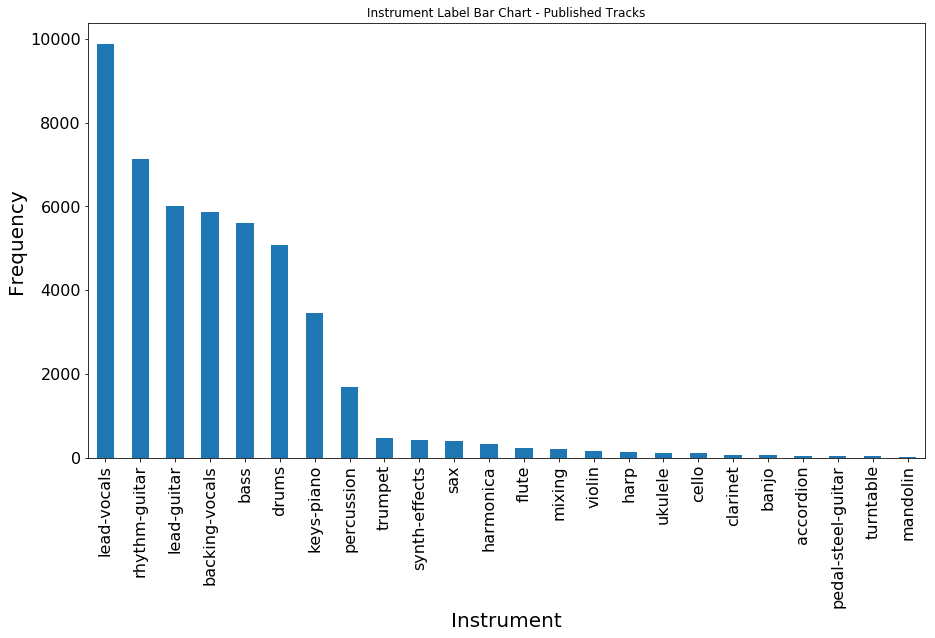

In [15]:
# instrument label frequency bar chart for published tracks
dfInstrument = getInstrumentLabels(pubData)
ax = dfInstrument.plot(kind='bar', title = 'Instrument Label Bar Chart - Published Tracks', legend = False, figsize=(15,8), fontsize = 16)
ax.set_xlabel("Instrument", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)

median 4.0


DescribeResult(nobs=34688, minmax=(1, 65), mean=4.835389760147602, variance=15.950934803541465, skewness=1.7445217795323131, kurtosis=6.754048773069028)

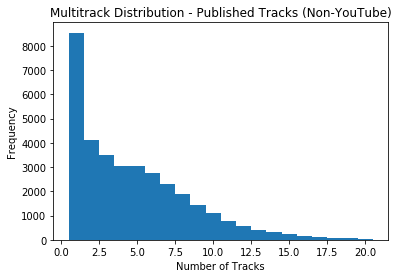

In [16]:
# multitrack descriptive stats and distribution for non-youtube published tracks
nonYouTubeMultiTracks = getMultiTrackLens(nonYouTubeData)
pyplot.hist(nonYouTubeMultiTracks,20, (0.5, 20.5))
pyplot.title("Multitrack Distribution - Published Tracks (Non-YouTube)")
pyplot.xlabel("Number of Tracks")
pyplot.ylabel("Frequency")
print('median', np.median(nonYouTubeMultiTracks))
stats.describe(nonYouTubeMultiTracks)

DescribeResult(nobs=167730, minmax=(-67.80525, 2078.37), mean=200.62205108951477, variance=8884.718541402886, skewness=0.6478173647459473, kurtosis=6.211957293248785)

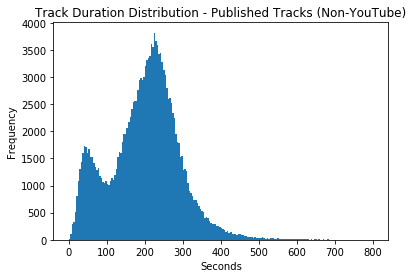

In [17]:
# track durations for non-youtube published tracks
nonYouTubeDurationData = nonYouTubeData.trackDuration
pyplot.hist(nonYouTubeDurationData, 200, (0, 800))
pyplot.title("Track Duration Distribution - Published Tracks (Non-YouTube)")
pyplot.xlabel("Seconds")
pyplot.ylabel("Frequency")
stats.describe(nonYouTubeDurationData)

DescribeResult(nobs=34688, minmax=(1.89, 2078.37), mean=247.54128935444996, variance=7785.149245396958, skewness=2.2805284606381577, kurtosis=25.34618598508164)

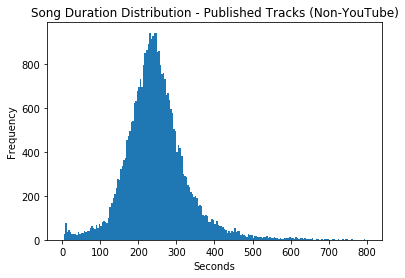

In [18]:
# song (mix) durations for non-youtube published tracks
nonYouTubeSongDurations = getSongDurations(nonYouTubeData)
pyplot.hist(nonYouTubeSongDurations, 200, (0, 800))
pyplot.title("Song Duration Distribution - Published Tracks (Non-YouTube)")
pyplot.xlabel("Seconds")
pyplot.ylabel("Frequency")
stats.describe(nonYouTubeSongDurations)

In [19]:
# info for all tracks is below

DescribeResult(nobs=239711, minmax=(1, 226), mean=2.4920425011785023, variance=25.616155233703218, skewness=6.410374783514974, kurtosis=82.29597415156276)

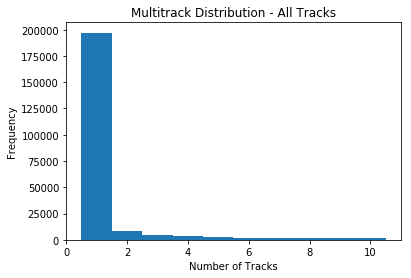

In [20]:
# multitrack descriptive stats and distribution for all tracks
multiTracksAll = getMultiTrackLens(data)
pyplot.hist(multiTracksAll,10, (0.5, 10.5))
pyplot.title("Multitrack Distribution - All Tracks")
pyplot.xlabel("Number of Tracks")
pyplot.ylabel("Frequency")
stats.describe(multiTracksAll)

DescribeResult(nobs=597370, minmax=(-67.80525, 97391.81866213153), mean=209.2961186710493, variance=496020.5085454401, skewness=132.2656980370066, kurtosis=18216.499349960828)

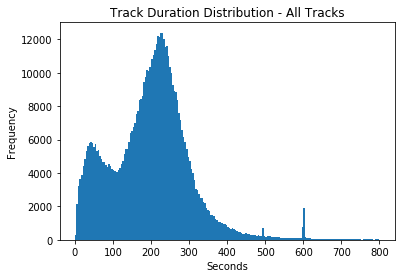

In [21]:
# track durations for all tracks
durationDataAll = data.trackDuration
pyplot.hist(durationDataAll, 200, (0, 800))
pyplot.title("Track Duration Distribution - All Tracks")
pyplot.xlabel("Seconds")
pyplot.ylabel("Frequency")
stats.describe(durationDataAll)

DescribeResult(nobs=239711, minmax=(0.068333, 97546.81866213153), mean=247.3320232132561, variance=350455.40036478505, skewness=148.9826200878024, kurtosis=24296.666449141045)

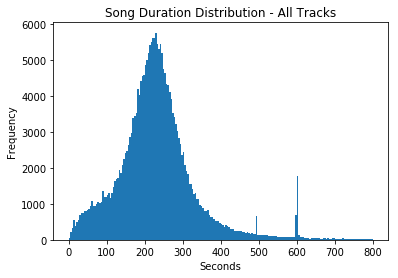

In [22]:
# song (mix) durations for all tracks
songDurationsAll = getSongDurations(data)
pyplot.hist(songDurationsAll, 200, (0, 800))
pyplot.title("Song Duration Distribution - All Tracks")
pyplot.xlabel("Seconds")
pyplot.ylabel("Frequency")
stats.describe(songDurationsAll)

Number of Tracks with Content Tags: 10452
Number of Content Tags: 23944


Text(0,0.5,'Frequency')

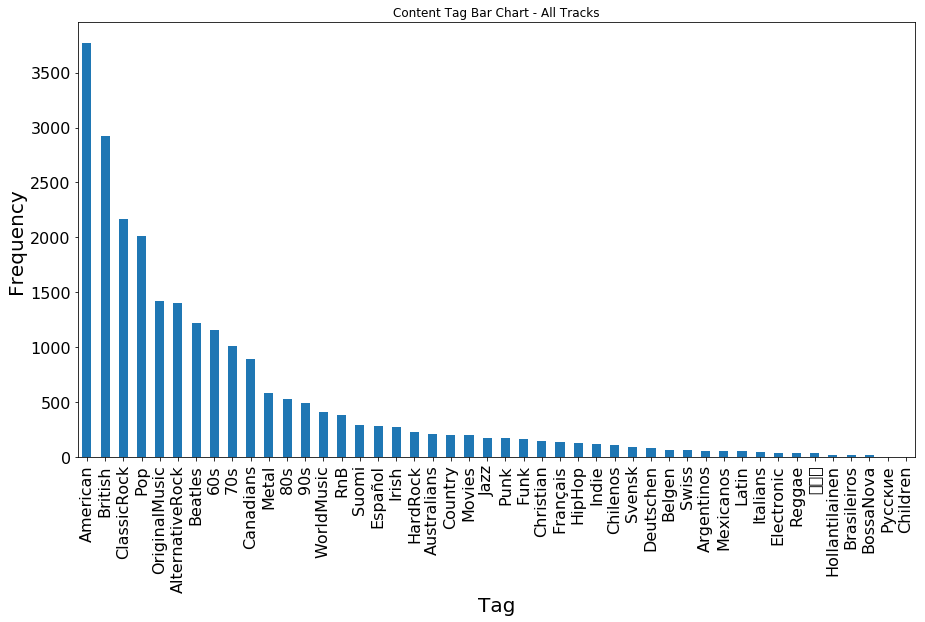

In [23]:
# content tag frequency bar chart for all tracks
dfContentAll = getContentTags(data)
ax = dfContentAll.plot(kind='bar', title = 'Content Tag Bar Chart - All Tracks', legend = False, figsize=(15,8), fontsize = 16)
ax.set_xlabel("Tag", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)  

Number of Tracks with Instrument Labels: 52581


Text(0,0.5,'Frequency')

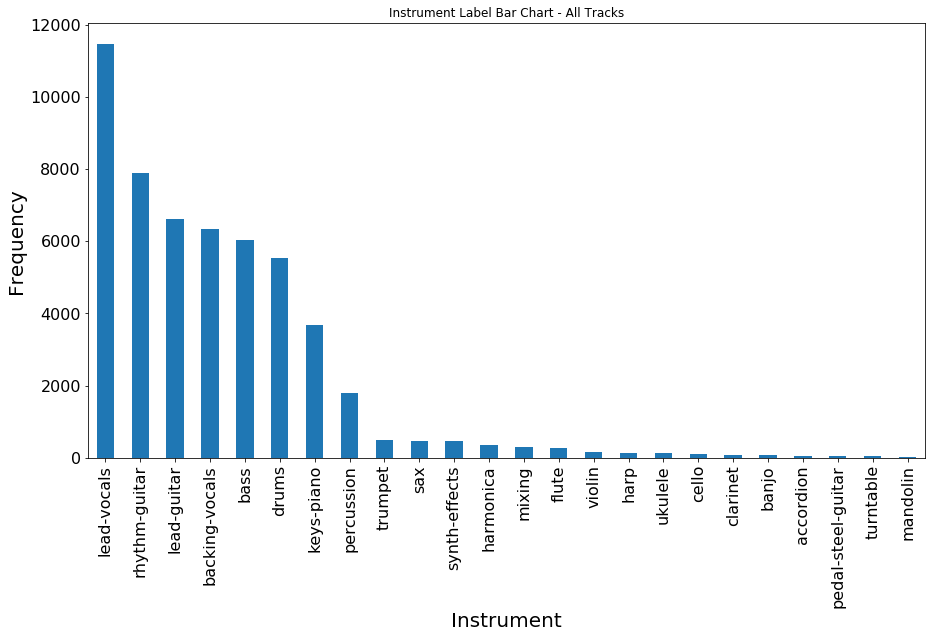

In [24]:
# instrument label frequency bar chart for all tracks
dfInstrumentAll = getInstrumentLabels(data)
ax = dfInstrumentAll.plot(kind='bar', title = 'Instrument Label Bar Chart - All Tracks', legend = False, figsize=(15,8), fontsize = 16)
ax.set_xlabel("Instrument", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)

median 5.0


DescribeResult(nobs=43494, minmax=(1, 225), mean=8.295466041293052, variance=85.49472250484774, skewness=3.2246536238580443, kurtosis=26.284926911001765)

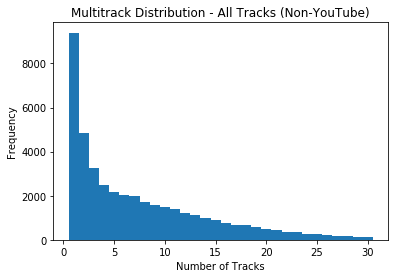

In [25]:
# multitrack descriptive stats and distribution for non-youtube all tracks
nonYouTubeMultiTracksAll = getMultiTrackLens(nonYouTubeDataAll)
pyplot.hist(nonYouTubeMultiTracksAll,30, (0.5, 30.5))
pyplot.title("Multitrack Distribution - All Tracks (Non-YouTube)")
pyplot.xlabel("Number of Tracks")
pyplot.ylabel("Frequency")
print('median', np.median(nonYouTubeMultiTracksAll))
stats.describe(nonYouTubeMultiTracksAll)

DescribeResult(nobs=360803, minmax=(-67.80525, 97391.81866213153), mean=187.06876341025676, variance=796367.8673735305, skewness=107.46479587119501, kurtosis=11702.159541629426)

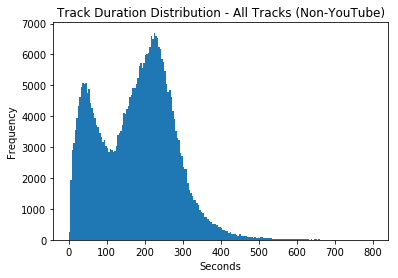

In [26]:
# track durations for non-youtube all tracks
nonYouTubeDurationDataAll = nonYouTubeDataAll.trackDuration
pyplot.hist(nonYouTubeDurationDataAll, 200, (0, 800))
pyplot.title("Track Duration Distribution - All Tracks (Non-YouTube)")
pyplot.xlabel("Seconds")
pyplot.ylabel("Frequency")
stats.describe(nonYouTubeDurationDataAll)

DescribeResult(nobs=43494, minmax=(0.27, 97546.81866213153), mean=258.1396773328311, variance=1755821.9335741343, skewness=72.60062175343234, kurtosis=5316.657001492419)

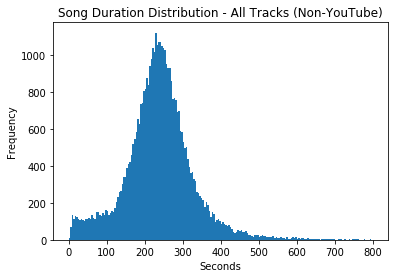

In [27]:
# song (mix) durations for non-youtube published tracks
nonYouTubeSongDurationsAll = getSongDurations(nonYouTubeDataAll)
pyplot.hist(nonYouTubeSongDurationsAll, 200, (0, 800))
pyplot.title("Song Duration Distribution - All Tracks (Non-YouTube)")
pyplot.xlabel("Seconds")
pyplot.ylabel("Frequency")
stats.describe(nonYouTubeSongDurationsAll)

In [ ]:
# end stats